In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Loading data set
# As file contians characters that cannot be decoded hence we shall try encodings like "latin1"
df = pd.read_csv(r"C:\Users\rajen\Desktop\ITV Project\spam_no_spam\spam.csv", encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Work flow 
- Data cleaning
- EDA
- Text preprocessing
- Model building
- Evaluation


# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# lets drop last 3 columns as more than 95% of data in these columns is missing
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Renaming columns
df.rename(columns={"v1" : "target",
                    "v2" : "text"}, inplace=True)
df.sample(5)

,target,text
3610,ham,No. I.ll meet you in the library
798,ham,Ok i msg u b4 i leave my house.
3869,ham,Oh ok wait 4 me there... My lect havent finish
3143,ham,"Haha I heard that, text me when you're around"
2674,ham,I am 6 ft. We will be a good combination!


In [8]:
# importing LabelEncoder and making object
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [9]:
df["target"] = encoder.fit_transform(df["target"])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# Checking duplicates
df.duplicated().sum()

403

In [13]:
# Removing duplicates
df.drop_duplicates(keep="first", inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# EDA

In [16]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

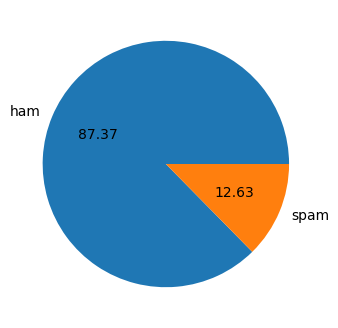

In [17]:
# Ploting pie chart for visualization
plt.figure(figsize=(4,4))
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%.2f")
plt.show()

Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# total number of characters in each message
df["num_char"] = df["text"].apply(len)

In [21]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# total number of sentence in each message
df["num_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
# total number of words in each message
df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_char,num_sentence,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [25]:
# ham
df[df["target"]==0][["num_char", "num_sentence", "num_words"]].describe()

,num_char,num_sentence,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [26]:
# spam
df[df["target"]==1][["num_char", "num_sentence", "num_words"]].describe()

,num_char,num_sentence,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


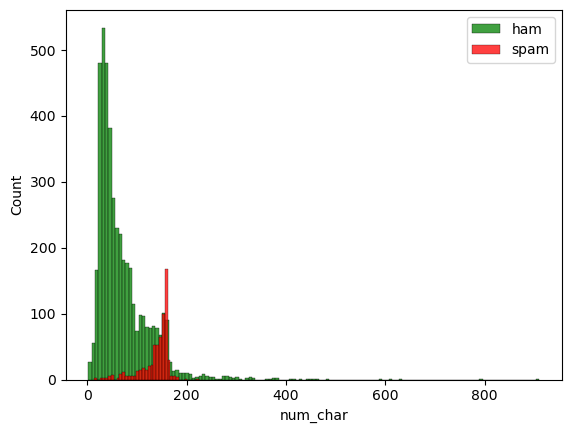

In [27]:
# Ploting histplot for ham and spam visualization according to number of characters
sns.histplot(df[df["target"]==0]["num_char"],color="green", label= "ham")
sns.histplot(df[df["target"]==1]["num_char"], color='red', label= "spam")
plt.legend()
plt.show()

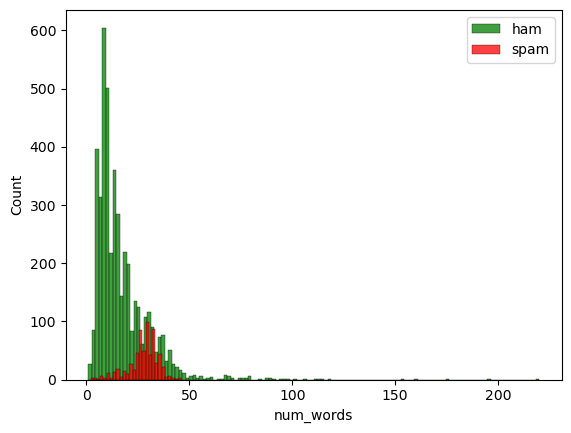

In [28]:
# Ploting histplot for ham and spam visualization according to number of words
sns.histplot(df[df["target"]==0]["num_words"],color="green", label= "ham")
sns.histplot(df[df["target"]==1]["num_words"], color='red', label= "spam")
plt.legend()
plt.show()

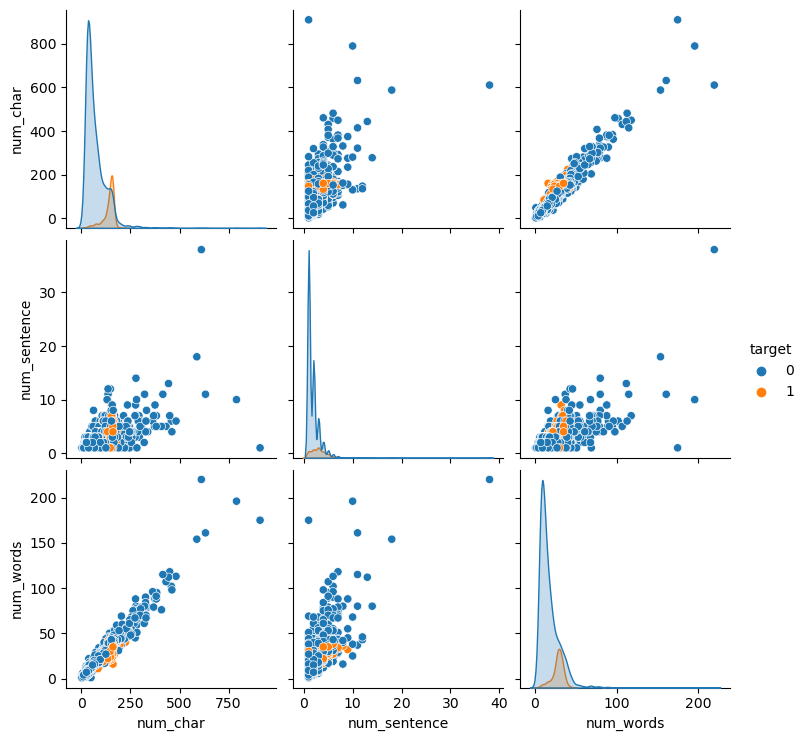

In [29]:
# Ploting pair plot to relationships, outliers etc
sns.pairplot(df, hue="target")
plt.show()

C:\Users\rajen\AppData\Local\Temp\ipykernel_12844\123133570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


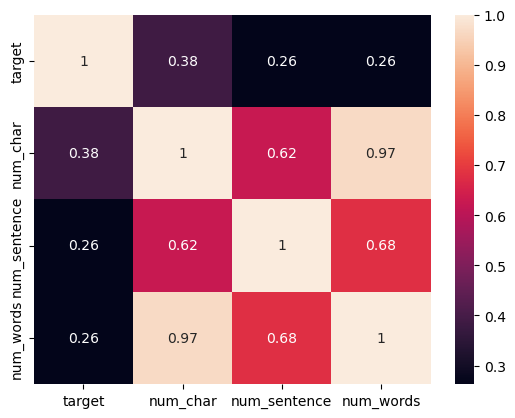

In [30]:
# Ploting pair plot to relationships, outliers etc
sns.pairplot(df, hue="target")
plt.show()

# Data preprocessing

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
import string

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
#function for preprocessing text
def transform_text(text):
    
    """
    Preprocesses the input text by performing the following steps:
    1. Converts the text to lowercase.
    2. Tokenizes the text into words using nltk.word_tokenize().
    3. Removes non-alphanumeric characters from the tokenized words.
    4. Removes stopwords and punctuation from the tokenized words.
    5. Stems the remaining words using PorterStemmer.
    
    Parameters:
    - text (str): The input text to be preprocessed.
    
    Returns:
    - str: The preprocessed text after applying all the preprocessing steps.
    """
    
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
# Preprocessing the text
df["transformed_text"] = df["text"].apply(transform_text)

In [36]:
df.head()

,target,text,num_char,num_sentence,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [37]:
# Making corpus of spam words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

9939

In [39]:
# Fetching most common 30 words used in spam message
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

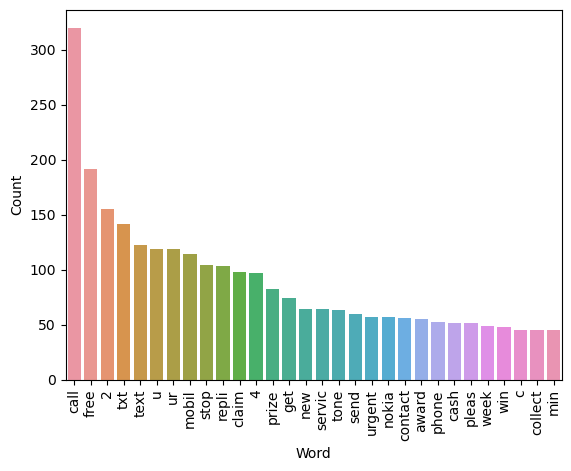

In [40]:
# Counting the occurrences of each word in the spam corpus
word_counts = Counter(spam_corpus).most_common(30)

# Creating a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Creating the bar plot
sns.barplot(data=word_counts_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# Making corpus of ham words
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(ham_corpus)

35404

In [43]:
# Fetching most common 30 words used in ham message
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

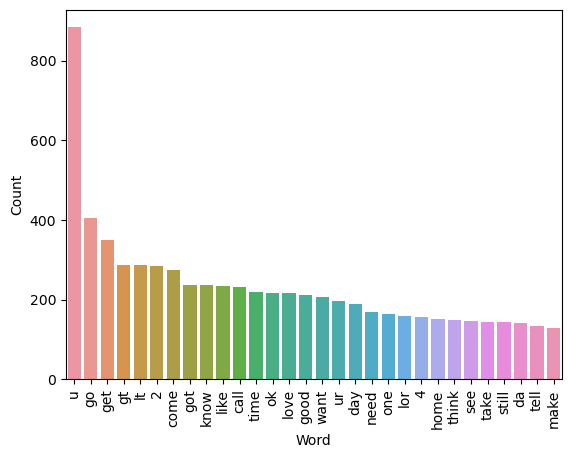

In [44]:
# Counting the occurrences of each word in the ham corpus
word_counts_ham = Counter(ham_corpus).most_common(30)

# Creating a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts_ham, columns=['Word', 'Count'])

# Creating the bar plot
sns.barplot(data=word_counts_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.head()

,target,text,num_char,num_sentence,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


# Model building

## Using CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [48]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
X.shape

(5169, 6708)

In [50]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
# Spliting data using train_test_split for training and testing of model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135, 6708)
(4135,)
(1034, 6708)
(1034,)


# Naive_bayes

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### GaussianNB

In [55]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred1))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred1))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred1))

accuracy_score:  0.8800773694390716
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[792 104]
 [ 20 118]]
----------------------------------------------------------------------------------------------------
precision_score:  0.5315315315315315


#### MultinomialNB

In [56]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred2))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred2))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred2))

accuracy_score:  0.9642166344294004
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[871  25]
 [ 12 126]]
----------------------------------------------------------------------------------------------------
precision_score:  0.8344370860927153


#### BernoulliNB

In [57]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred3))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred3))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred3))

accuracy_score:  0.9700193423597679
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[893   3]
 [ 28 110]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9734513274336283


## Using TfidfVectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [59]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [60]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4135, 6708)
(4135,)
(1034, 6708)
(1034,)


In [64]:
# Model building for tfid

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### GaussianNB

In [66]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred1))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred1))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred1))

accuracy_score:  0.8762088974854932
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[793 103]
 [ 25 113]]
----------------------------------------------------------------------------------------------------
precision_score:  0.5231481481481481


#### MultinomialNB

In [67]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred2))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred2))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred2))

accuracy_score:  0.9593810444874274
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[896   0]
 [ 42  96]]
----------------------------------------------------------------------------------------------------
precision_score:  1.0


#### BernoulliNB

In [68]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred3))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred3))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred3))

accuracy_score:  0.9700193423597679
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[893   3]
 [ 28 110]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9734513274336283


In [69]:
# Making dictionary of models for there corresponding accuracy and precision score
accuracy_score_list = dict()
precision_score_list = dict()

accuracy_score_list["MultinomialNB"] = accuracy_score(y_test, y_pred2)
precision_score_list["MultinomialNB"] = precision_score(y_test, y_pred2)

print(accuracy_score_list)
print(precision_score_list)

{'MultinomialNB': 0.9593810444874274}
{'MultinomialNB': 1.0}


In [70]:
# tfid---> mnb is working best still now

# Logistic Regression

In [71]:
# Importing LogisticRegression from sklearn and making an object as lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [72]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred_lr))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_lr))

accuracy_score:  0.9468085106382979
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[895   1]
 [ 54  84]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9882352941176471


In [73]:
accuracy_score_list["Logistic Regression"] = accuracy_score(y_test, y_pred_lr)
precision_score_list["Logistic Regression"] = precision_score(y_test, y_pred_lr)

print(accuracy_score_list)
print(precision_score_list)

{'MultinomialNB': 0.9593810444874274, 'Logistic Regression': 0.9468085106382979}
{'MultinomialNB': 1.0, 'Logistic Regression': 0.9882352941176471}


# DecisionTree 

In [74]:
# Importing DecisionTreeClassifier from sklearn and making an object as dt

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [75]:
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred_dt))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_dt))

accuracy_score:  0.9487427466150871
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[869  27]
 [ 26 112]]
----------------------------------------------------------------------------------------------------
precision_score:  0.8057553956834532


In [76]:
accuracy_score_list["DecisionTree"] = accuracy_score(y_test, y_pred_dt)
precision_score_list["DecisionTree"] = precision_score(y_test, y_pred_dt)

print(accuracy_score_list)
print(precision_score_list)

{'MultinomialNB': 0.9593810444874274, 'Logistic Regression': 0.9468085106382979, 'DecisionTree': 0.9487427466150871}
{'MultinomialNB': 1.0, 'Logistic Regression': 0.9882352941176471, 'DecisionTree': 0.8057553956834532}


# KNeighborsClassifier

In [77]:
# Importing KNeighborsClassifier from sklearn and making an object as knc

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [78]:
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred_knc))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_knc))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_knc))

accuracy_score:  0.9003868471953579
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[896   0]
 [103  35]]
----------------------------------------------------------------------------------------------------
precision_score:  1.0


In [79]:
accuracy_score_list["KNeighborsClassifier"] = accuracy_score(y_test, y_pred_knc)
precision_score_list["KNeighborsClassifier"] = precision_score(y_test, y_pred_knc)

# RandomForestClassifier

In [80]:
# Importing RandomForestClassifier from sklearn and making an object as rfc

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [81]:
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred_rfc))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_rfc))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_rfc))

accuracy_score:  0.9738878143133463
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[895   1]
 [ 26 112]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9911504424778761


In [82]:
accuracy_score_list["RandomForestClassifier"] = accuracy_score(y_test, y_pred_rfc)
precision_score_list["RandomForestClassifier"] = precision_score(y_test, y_pred_rfc)

# Svm

In [83]:
from sklearn import svm
svm_model = svm.SVC(kernel="linear")

In [84]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred_svm))
print("-----"*20)
print("confusion_matrix: \n", confusion_matrix(y_test, y_pred_svm))
print("-----"*20)
print("precision_score: ", precision_score(y_test, y_pred_svm))

accuracy_score:  0.9787234042553191
----------------------------------------------------------------------------------------------------
confusion_matrix: 
 [[893   3]
 [ 19 119]]
----------------------------------------------------------------------------------------------------
precision_score:  0.9754098360655737


In [85]:
accuracy_score_list["SVM"] = accuracy_score(y_test, y_pred_svm)
precision_score_list["SVM"] = precision_score(y_test, y_pred_svm)

In [86]:
for i in accuracy_score_list:
    print(i, ": ",round(accuracy_score_list[i],3))

MultinomialNB :  0.959
Logistic Regression :  0.947
DecisionTree :  0.949
KNeighborsClassifier :  0.9
RandomForestClassifier :  0.974
SVM :  0.979


In [87]:
# Creating Datafram
accuracy_score_df = pd.DataFrame(list(accuracy_score_list.items()), columns=["Classifier", "Accuracy"])
accuracy_score_df

,Classifier,Accuracy
0,MultinomialNB,0.959381
1,Logistic Regression,0.946809
2,DecisionTree,0.948743
3,KNeighborsClassifier,0.900387
4,RandomForestClassifier,0.973888
5,SVM,0.978723


In [88]:
for i in precision_score_list:
    print(i, ": ",round(precision_score_list[i],3))

MultinomialNB :  1.0
Logistic Regression :  0.988
DecisionTree :  0.806
KNeighborsClassifier :  1.0
RandomForestClassifier :  0.991
SVM :  0.975


In [89]:
# Creating Datafram
precision_score_df = pd.DataFrame(list(precision_score_list.items()), columns=["Classifier", "Precision"])
precision_score_df

,Classifier,Precision
0,MultinomialNB,1.000000
1,Logistic Regression,0.988235
2,DecisionTree,0.805755
3,KNeighborsClassifier,1.000000
4,RandomForestClassifier,0.991150
5,SVM,0.975410


In [90]:
accuracy_precision_df = pd.merge(accuracy_score_df, precision_score_df)
accuracy_precision_df

,Classifier,Accuracy,Precision
0,MultinomialNB,0.959381,1.000000
1,Logistic Regression,0.946809,0.988235
2,DecisionTree,0.948743,0.805755
3,KNeighborsClassifier,0.900387,1.000000
4,RandomForestClassifier,0.973888,0.991150
5,SVM,0.978723,0.975410


In [91]:
accuracy_precision_df = accuracy_precision_df.sort_values(by="Precision", ascending=False).reset_index(drop=True)
accuracy_precision_df

,Classifier,Accuracy,Precision
0,MultinomialNB,0.959381,1.000000
1,KNeighborsClassifier,0.900387,1.000000
2,RandomForestClassifier,0.973888,0.991150
3,Logistic Regression,0.946809,0.988235
4,SVM,0.978723,0.975410
5,DecisionTree,0.948743,0.805755


MultinomialNB model has high precision of 100% as well as accuracy of 95%, so we will work with this model

# Deployment

In [92]:
# importing dependencies
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# loading Dataset and processing
df = pd.read_csv(r"C:\Users\rajen\Desktop\ITV Project\spam_no_spam\spam.csv", encoding="latin1")
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
df.rename(columns={"v1" : "target",
                    "v2" : "text"}, inplace=True)

encoder= LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])


# Pre-processing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


# Preprocessing the text
df["transformed_text"] = df["text"].apply(transform_text)


# preparing X and y
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df["transformed_text"]).toarray()

y = df["target"].values


# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X, y)

# Function to predict spam or no_spam
def predict_spam_or_ham(text):
    transformed_text = transform_text(text)
    vectorized_text = tfidf.transform([transformed_text])
    prediction = model.predict(vectorized_text)[0]
    #return "Spam" if prediction == 1 else "No_spam"
    if prediction == 1:
        return "Spam"
    else:
        return "No spam"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_spam_or_ham,
    inputs=gr.TextArea(lines=5, label="Enter your message here:"),
    outputs="text",
    title="Spam or No_spam Classifier",
    description="Enter a message to classify whether it's spam or No_spam.",
    theme='freddyaboulton/dracula_revamped'
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7860
IMPORTANT: You are using gradio version 4.19.2, however version 4.29.0 is available, please upgrade.
--------

To create a public link, set `share=True` in `launch()`.
